# Predicting House Sale Prices Using Past Sales and Feature Data

- Timothy McKee - February 17, 2025

## Problem Definition


The goal in this project is to predict the sale price of a house based on the house's features. This is a supervised regression problem. This project will use linear regression to predict and calculate the root mean square percentage error to evaluate our results.

## Data Collection/Sources


Our data come from a CSV file housed on Amazon web services:

url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'


It also comes with a data dictionary explaining what is in the different columns. That is housed on AWS as well, here:

https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf

First, we will import some of the libraries we will use later on.

In [ ]:
# # imports
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression





In [ ]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'


In [ ]:
train_orig = pd.read_csv(url)
train_orig.shape

(2637, 81)

In [ ]:
train_orig.size

213597

It appears that we successfully imported the CSV into our data frame.

81 columns, 2637 rows and 213,597 data points.

In [ ]:
train_orig.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
train_orig.tail()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


We're seeing both numerical and categorical data in the various columns. Generally, it looks like the columns are all features describing individual properties.

SalePrice is the final column. Sale price is also our prediction target, making this a supervised data problem. Continuous numerical data should be predicted using regression.

The following overview will show among other things for data types are in the different columns, as well as whether they contain 2637 non-null values each, or alternatively do have nulls. We'll see the column names vertically displayed too.

In [ ]:
train_orig.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

## Data Cleaning


The info method showed us that there were some no values and some categorical data. Let's get a count of each type.

In [ ]:
train_orig.dtypes.value_counts()

,count
object,43
int64,27
float64,11


Categorical data in the 43 object columns would be a bit difficult to work with and would like to require us to use one-hot encoding to replace word labels with binary numbers. We already have 81 columns and that process would add more for any particular category. That might be a reason to remove columns instead.

Before making any changes to the data frame. I'm going to make a copy to work on in place of the original.

In [ ]:
train = train_orig.copy()
train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


This confirms that the copy was made successfully. We also see you again that we have a lot of categorical data. It's not immediately clear, but some of it is meant to represent. We may also have some categorical data represented with numbers in columns like MS SubClass.

 PID is the first column and has "ID" in its name. It could be a unique identifier that doesn't provide information about the properties.

In [ ]:
train["PID"].nunique()

2637

There are as many unique values in PID as there are rows in the data set. We'll remove this unique identifier column.

In [ ]:
train.drop( columns = "PID" , inplace = True)
train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

 Let's see what some of the columns are with the highest number of null values.

In [ ]:
na_count = train.isna().sum().sort_values( ascending = False )
na_count.head()

,0
Pool QC,2626
Misc Feature,2541
Alley,2457
Fence,2109
Mas Vnr Type,1607


Some columns are mostly nulls. What are all the columns with nulls?

In [ ]:
na_count[na_count > 0]

,0
Pool QC,2626
Misc Feature,2541
Alley,2457
Fence,2109
Mas Vnr Type,1607
Fireplace Qu,1284
Lot Frontage,449
Garage Cond,147
Garage Yr Blt,147
Garage Finish,147


Some columns have relatively few. Let's drop anything with the significant proportion of nulls values.

In [ ]:
to_drop = na_count[na_count > 1000].index
to_drop

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type',
       'Fireplace Qu'],
      dtype='object')

In [ ]:
train = train.drop(columns=to_drop)

What are now the columns with the highest counts?

In [ ]:
na_count = train.isna().sum().sort_values( ascending = False )
na_count.head()

,0
Lot Frontage,449
Garage Cond,147
Garage Yr Blt,147
Garage Finish,147
Garage Qual,147


In [ ]:
train.shape

(2637, 74)

Lot Frontage is the only column with more than 150 null values. The data dictionary defines it as:

> Lot Frontage (Continuous): Linear feet of street connected to property

Seems like it could be an important predictor. Given that, and given that the numbers are smaller in the other columns, we'll remove all rows that still have nulls from the data set. It will remove a few thousand rows, but we'll see what we can get if we do this instead of imputing in order to fill those spots with estimated values.

In [ ]:
train.dropna(axis = 0 , inplace = True)

In [ ]:
train.shape

(1984, 74)

We now have 1984 rows, and still 70 columns.

In [ ]:
na_sum = train.isna().sum()
na_sum.sort_values( ascending = False)

,0
MS SubClass,0
Garage Yr Blt,0
Fireplaces,0
Functional,0
TotRms AbvGrd,0
...,...
Exter Qual,0
Mas Vnr Area,0
Exterior 2nd,0
Exterior 1st,0


In [ ]:
na_sum.sum()

0

No more null values.

In [ ]:
train_orig.dtypes.value_counts()

,count
object,43
int64,27
float64,11


There are still 43 object type columns that don't have numerical data. Let's look at what they are.

In [ ]:
object_columns = train.select_dtypes(include=['object']).columns
object_columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

Let's assume that these are not the most important predictors and remove them.

In [ ]:
train = train.drop(columns=object_columns)
train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,62.0,14299,4,3,1964,1964,0.0,513.0,144.0,...,0,0,0,0,0,0,0,7,2007,115400
2,50,50.0,9000,6,6,1937,1950,0.0,0.0,0.0,...,0,162,0,0,126,0,0,12,2007,141000
3,60,68.0,7379,8,5,2000,2000,0.0,484.0,0.0,...,280,184,0,0,0,0,0,4,2010,254000
4,70,60.0,7200,7,9,1936,2007,0.0,350.0,210.0,...,256,0,0,0,0,0,0,4,2009,155000
5,20,70.0,8521,5,5,1967,1967,0.0,842.0,0.0,...,0,0,0,0,0,0,0,5,2010,125000


The Overall and Misc columns jump out somewhat. Checking the documentation on those:


> Overall Qual (Ordinal): Rates the overall material and finish of the
house\
 10 Very Excellent\
 9 Excellent\
 8 Very Good\
 ...



> Misc Val (Continuous): $Value of miscellaneous feature

We removed Misc Feature, which was categorical, but this is a dollar amount. We'll keep that.


In [ ]:
train.drop(columns=["Overall Qual" ,
                    "Overall Cond" ,
                    "Low Qual Fin SF" ,
                    ], inplace=True)

In [ ]:
train.shape

(1984, 34)

In [ ]:
train.nunique().sort_values( ascending=False )

,0
Lot Area,1368
Gr Liv Area,1043
Bsmt Unf SF,961
1st Flr SF,902
Total Bsmt SF,888
SalePrice,835
BsmtFin SF 1,804
Garage Area,527
2nd Flr SF,503
Mas Vnr Area,377


We now have 34 columns, and all the data are numerical. Some like Lot Area, are continuous, and some, like Full Bath, are discrete. This makes sense.

## Exploratory Data Analysis


In [ ]:
train['SalePrice'].describe( include = "all" ).transpose()

,SalePrice
count,1984.000000
mean,185340.652722
std,81623.020601
min,12789.000000
25%,131475.000000
50%,163000.000000
75%,217000.000000
max,745000.000000


In [ ]:
# (train.sort_values(by=['SalePrice'], ascending=True)).head()

We can see that there's no zero in the target because the minimum sale price is 12,789. No zero in the target means that we can calculate Root Mean Squared Error, or RMSE, when we are evaluating our prediction model later on.


Given that the maximum is 745,000, it's interesting that the minimum is so low.

In [ ]:
train['SalePrice'].dtypes

dtype('int64')

The target column contains integers and no decimal points, but it's continuous currency data.

In [ ]:
# train.describe( include = "all" ).transpose()

array([[<Axes: title={'center': 'MS SubClass'}>,
        <Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Lot Area'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Year Remod/Add'}>,
        <Axes: title={'center': 'Mas Vnr Area'}>],
       [<Axes: title={'center': 'BsmtFin SF 1'}>,
        <Axes: title={'center': 'BsmtFin SF 2'}>,
        <Axes: title={'center': 'Bsmt Unf SF'}>,
        <Axes: title={'center': 'Total Bsmt SF'}>,
        <Axes: title={'center': '1st Flr SF'}>,
        <Axes: title={'center': '2nd Flr SF'}>],
       [<Axes: title={'center': 'Gr Liv Area'}>,
        <Axes: title={'center': 'Bsmt Full Bath'}>,
        <Axes: title={'center': 'Bsmt Half Bath'}>,
        <Axes: title={'center': 'Full Bath'}>,
        <Axes: title={'center': 'Half Bath'}>,
        <Axes: title={'center': 'Bedroom AbvGr'}>],
       [<Axes: title={'center': 'Kitchen AbvGr'}>,
        <Axes: title={'center': 'TotRms AbvGrd'}>,
      

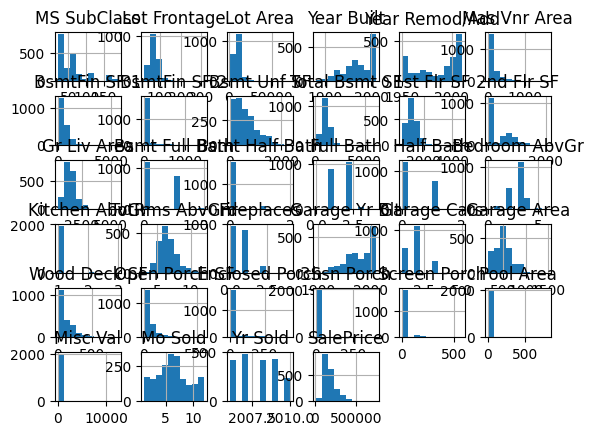

In [ ]:
train.hist()

Some normal distributions, some not normal, and some clearly discreet data with only a few different values like counts of rooms.

In [ ]:
train.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

We noticed earlier that MS SubClass looks like it might be categorical data even though it contains numbers. Let's take a look.

In [ ]:
train['MS SubClass'].head(10)

,MS SubClass
0,20
2,50
3,60
4,70
5,20
6,20
7,50
9,40
10,20
11,120


Discrete numbers, and intervals of 10. It could be an ordinal ranking of some sort. Consulting the data, dictionary:

> MS SubClass (Nominal): Identifies the type of dwelling involved in the
sale.\
 020 1-STORY 1946 & NEWER ALL STYLES\
 030 1-STORY 1945 & OLDER\
 040 1-STORY W/FINISHED ATTIC ALL AGES\
 ...

There are 15 to 20 categories. The data dictionary explains that this is nominal data that's being represented with numbers. We will remove this column as well.



In [ ]:
train.drop(columns = ["MS SubClass"], inplace = True)


## Processing


We're now looking for correlation between our features and our target.

In [ ]:
cor_target = train.corr()
cor_target.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Lot Frontage,1.000000,0.578630,0.128819,0.104505,0.228905,0.228616,0.032804,0.121991,0.401961,0.455591,...,0.112694,0.171253,-0.002350,0.025136,0.066175,0.132530,0.015858,0.026664,-0.006044,0.365275
Lot Area,0.578630,1.000000,0.081673,0.092424,0.182906,0.258200,0.053239,0.061018,0.378264,0.428322,...,0.213993,0.148469,-0.002542,0.006317,0.106226,0.118892,0.038905,0.032734,-0.031974,0.374111
Year Built,0.128819,0.081673,1.000000,0.636962,0.321469,0.257473,-0.041576,0.150582,0.434147,0.333933,...,0.225117,0.219071,-0.396466,0.017753,-0.073492,0.018294,-0.034068,0.010709,0.004918,0.561842
Year Remod/Add,0.104505,0.092424,0.636962,1.000000,0.205001,0.124253,-0.055195,0.170297,0.299751,0.278733,...,0.226829,0.266152,-0.240318,0.012631,-0.065788,-0.000441,-0.029055,0.038456,0.040174,0.541105
Mas Vnr Area,0.228905,0.182906,0.321469,0.205001,1.000000,0.306234,-0.048219,0.081035,0.411532,0.407488,...,0.169730,0.125614,-0.127282,0.021561,0.051635,0.023153,-0.020712,0.008143,-0.022703,0.521027


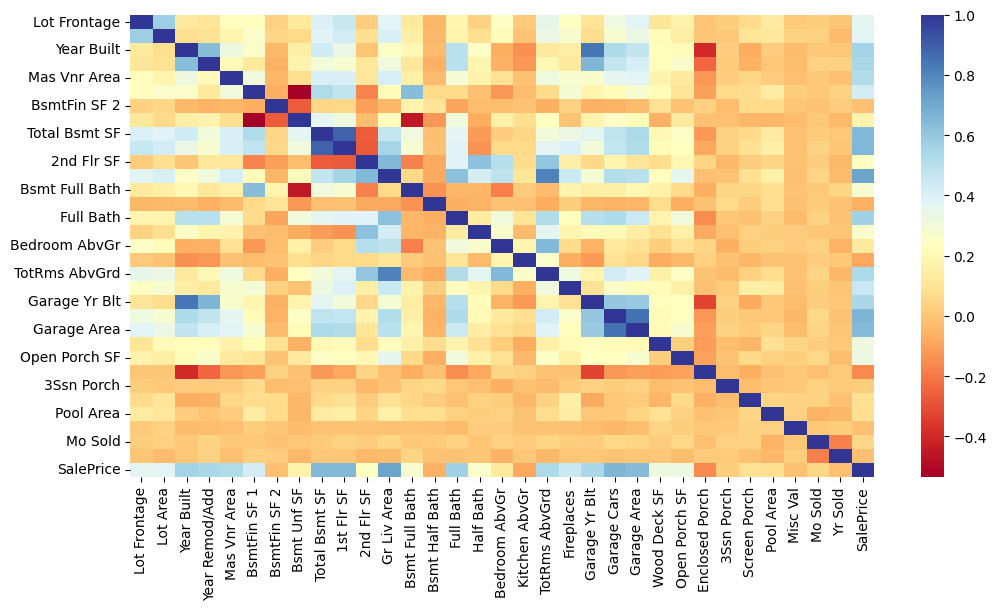

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cor_target, cmap='RdYlBu',annot = False ) ;

Some positive and some negative correlation with our target. Some seems not to be very strong.

Linear regression works best when the features are not correlated with each other. We'll check for that now.

In [ ]:
target_drop= train.drop(columns = ["SalePrice"])
target_drop.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,62.0,14299,1964,1964,0.0,513.0,144.0,348.0,1005.0,1005,...,440.0,0,0,0,0,0,0,0,7,2007
2,50.0,9000,1937,1950,0.0,0.0,0.0,780.0,780.0,780,...,544.0,0,162,0,0,126,0,0,12,2007
3,68.0,7379,2000,2000,0.0,484.0,0.0,491.0,975.0,975,...,592.0,280,184,0,0,0,0,0,4,2010
4,60.0,7200,1936,2007,0.0,350.0,210.0,0.0,560.0,575,...,576.0,256,0,0,0,0,0,0,4,2009
5,70.0,8521,1967,1967,0.0,842.0,0.0,70.0,912.0,912,...,336.0,0,0,0,0,0,0,0,5,2010


In [ ]:
cor_feat = target_drop.corr()
cor_feat.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
Lot Frontage,1.000000,0.578630,0.128819,0.104505,0.228905,0.228616,0.032804,0.121991,0.401961,0.455591,...,0.376346,0.112694,0.171253,-0.002350,0.025136,0.066175,0.132530,0.015858,0.026664,-0.006044
Lot Area,0.578630,1.000000,0.081673,0.092424,0.182906,0.258200,0.053239,0.061018,0.378264,0.428322,...,0.331183,0.213993,0.148469,-0.002542,0.006317,0.106226,0.118892,0.038905,0.032734,-0.031974
Year Built,0.128819,0.081673,1.000000,0.636962,0.321469,0.257473,-0.041576,0.150582,0.434147,0.333933,...,0.475242,0.225117,0.219071,-0.396466,0.017753,-0.073492,0.018294,-0.034068,0.010709,0.004918
Year Remod/Add,0.104505,0.092424,0.636962,1.000000,0.205001,0.124253,-0.055195,0.170297,0.299751,0.278733,...,0.413395,0.226829,0.266152,-0.240318,0.012631,-0.065788,-0.000441,-0.029055,0.038456,0.040174
Mas Vnr Area,0.228905,0.182906,0.321469,0.205001,1.000000,0.306234,-0.048219,0.081035,0.411532,0.407488,...,0.373282,0.169730,0.125614,-0.127282,0.021561,0.051635,0.023153,-0.020712,0.008143,-0.022703


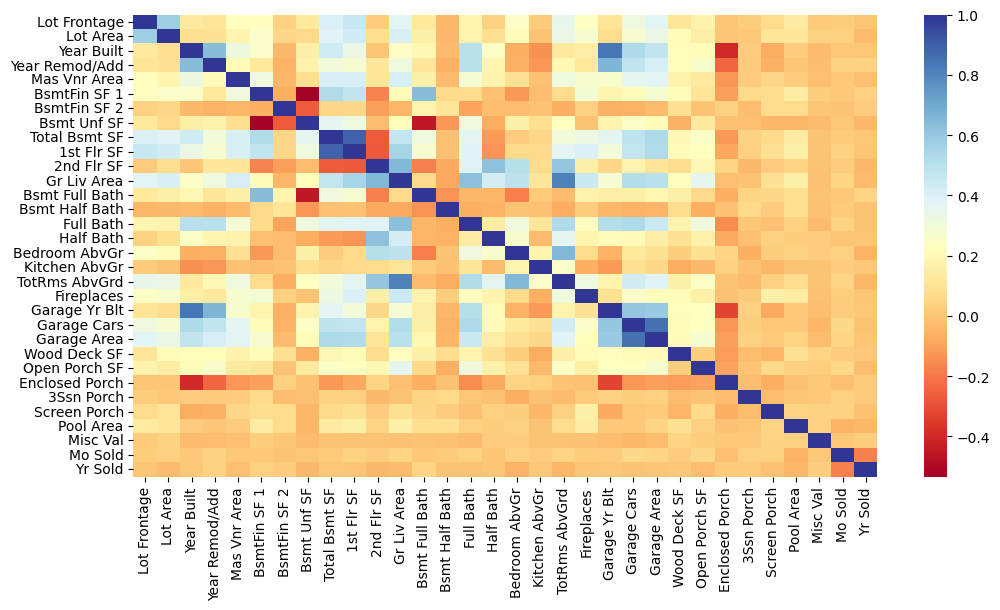

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cor_feat, cmap='RdYlBu',annot = False ) ;

In [ ]:
#mask = np.triu(np.ones_like(corr, dtype=bool))
#mask

In [ ]:
# lower_triangle = corr.mask(mask)
# lower_triangle

In [ ]:
# corr_pair = lower_triangle.unstack().dropna().sort_values(ascending=False)
# corr_pair.head(10)

Let's look at the features which are most correlated with each other, and exclude the value of one which would indicate the same feature correlating with itself.

In [ ]:
corr_pair = cor_feat.unstack().dropna().sort_values(ascending=False)
corr_pair[corr_pair < 1].head(10)

,,0
1st Flr SF,Total Bsmt SF,0.891820
Total Bsmt SF,1st Flr SF,0.891820
Garage Cars,Garage Area,0.852953
Garage Area,Garage Cars,0.852953
Year Built,Garage Yr Blt,0.838526
Garage Yr Blt,Year Built,0.838526
TotRms AbvGrd,Gr Liv Area,0.813049
Gr Liv Area,TotRms AbvGrd,0.813049
Garage Yr Blt,Year Remod/Add,0.659090
Year Remod/Add,Garage Yr Blt,0.659090


In [ ]:
train.shape

(1984, 33)

Let's drop some of the highly correlated features. Total Bsmt SF, for instance, reasonably correlates highly with	1st Flr SF.

In [ ]:
train.drop(columns=["Total Bsmt SF", "Garage Cars", "Garage Yr Blt"], inplace=True)

In [ ]:
train.columns

Index(['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [ ]:
# u_counts = train.nunique()
# d_types = train.dtypes
# u_d_df = pd.DataFrame({'Unique': u_counts, 'DType': d_types})
# u_d_df.sort_values(by = ['DType' , 'Unique' ] , ascending=True)

In [ ]:
train.shape

(1984, 30)

In [ ]:
train.columns

Index(['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

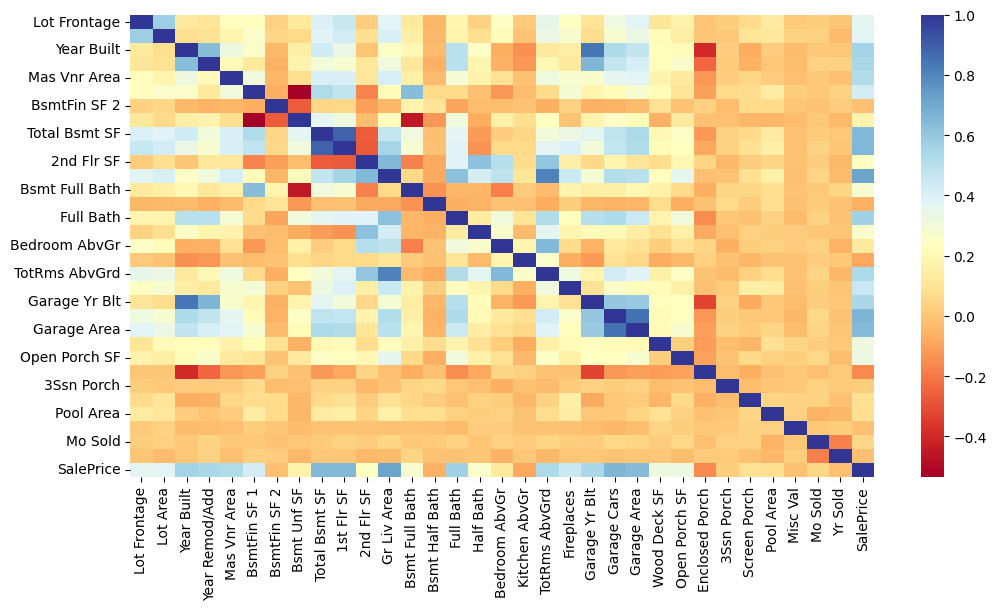

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='RdYlBu',annot = False ) ;

## Data Visualization/Communication of Results


We'll put together a linear regression model.

In [ ]:
# First we will break up our data into training and testing sets
X = train.drop(columns = ["SalePrice"])
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

X = train.drop(columns = ["SalePrice"])


In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

( myfit2.intercept_ , myfit2.coef_ )


(-139365.06842062093,
 array([-3.06060233e+01,  3.17105424e-02,  3.78595757e+02,  5.55825478e+02,
         4.09034425e+01,  3.32922264e+01,  2.97633887e+01,  2.47386045e+01,
         5.30287491e+01,  4.43254968e+01,  1.05482463e+01,  9.83348422e+03,
        -3.54927490e+02,  4.55248329e+03,  3.47393062e+02, -1.03324691e+04,
        -5.04897125e+04,  7.36027102e+03,  9.85741051e+03,  5.54088647e+01,
         3.07777782e+01, -1.61768065e+01,  2.69826510e+01,  1.69719974e+01,
         6.66531832e+01, -1.18780974e+02,  2.53110726e-01,  2.53512988e+02,
        -8.30691359e+02]))

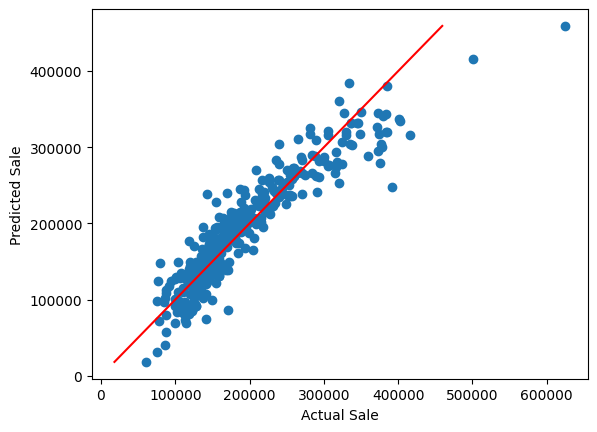

In [ ]:
# See how well our model performs on our test data
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual Sale')
plt.ylabel('Predicted Sale') ;

It seems to miss some low and high values, but catch a fair amount in between.

In [ ]:
list(zip(y_test,y_pred))[:10]

[(167900, 182406.3122491922),
 (173000, 178713.94445270364),
 (177900, 195796.95310027263),
 (103000, 84313.85801091994),
 (218836, 230016.4467354628),
 (107500, 135487.61747355497),
 (218689, 194885.91442775208),
 (264500, 265553.54339409916),
 (174000, 204921.30124366278),
 (337000, 332403.93829772103)]

In [ ]:
# Calculate root mean squared percentage error on test data
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE: {rmspe}")

RMSPE: 17.21853657154928


We want to cross validate our model with multiple prediction runs.

Sklearn doesn't have a scoring parameter built-in for RMSPE, so we'll create one using make_scorer.

In [ ]:
# Define a custom scoring function for RMSPE
def root_mean_squared_percentage_error(y_true, y_pred):
    """Calculates the Root Mean Squared Percentage Error (RMSPE)."""
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

# Use cross validation with the custom scoring function
# Use make_scorer to convert the RMSPE function to a scorer object
from sklearn.metrics import make_scorer
rmspe_scorer = make_scorer(root_mean_squared_percentage_error, greater_is_better=False)  # greater_is_better=False for RMSPE (lower is better)

results = cross_val_score(model, X, y, scoring=rmspe_scorer, cv=10)

# Get the average RMSPE across all folds
avg_rmspe = abs(results.mean())  # Take the absolute value as the scorer returns negative values
print(f"CV RMSPE: {avg_rmspe}")

CV RMSPE: 25.06206872282515


Our cross-validated error is 25.06, higher than the initial result.

## Residual Analysis

We want to see residuals normally distributed.

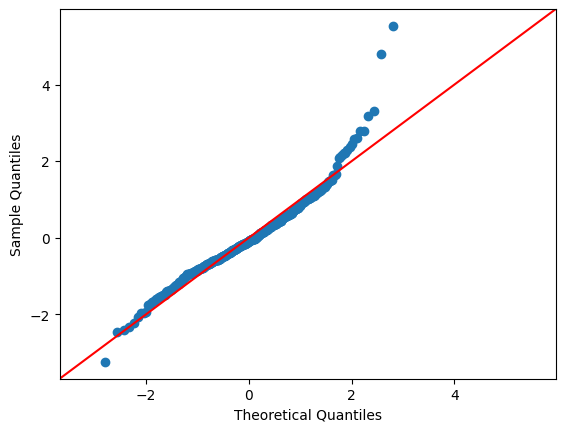

In [ ]:
# QQ Plot - See distribution of residuals
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

<Axes: >

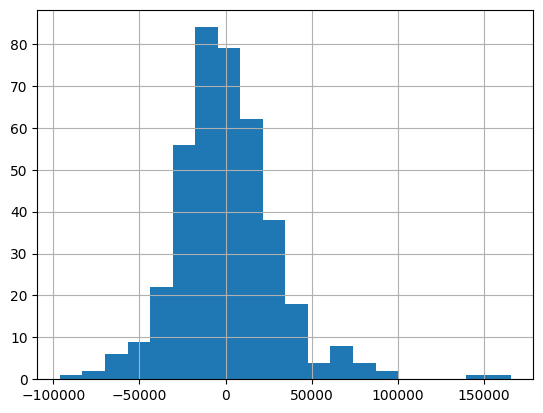

In [ ]:
res.hist(bins = 20 )

Some outliers, but normally distributed overall.

The residuals are ideally spread across the range of predictions, or evenly distributed.

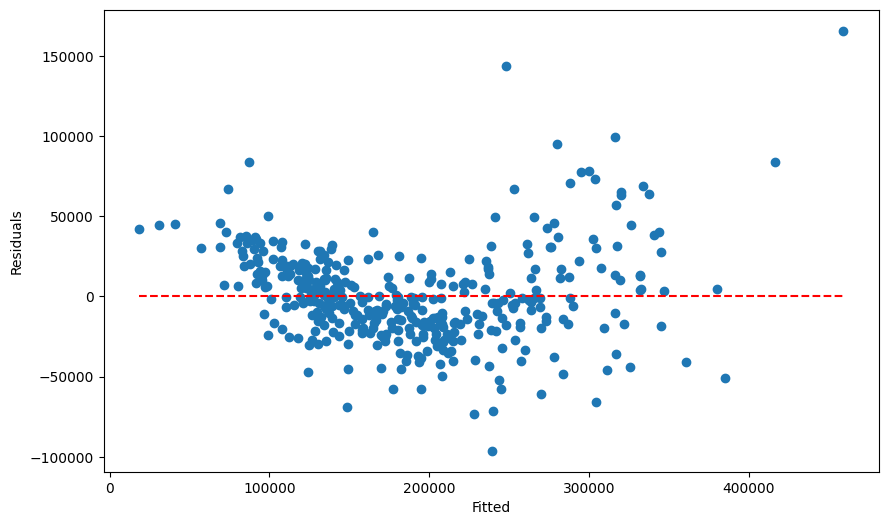

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

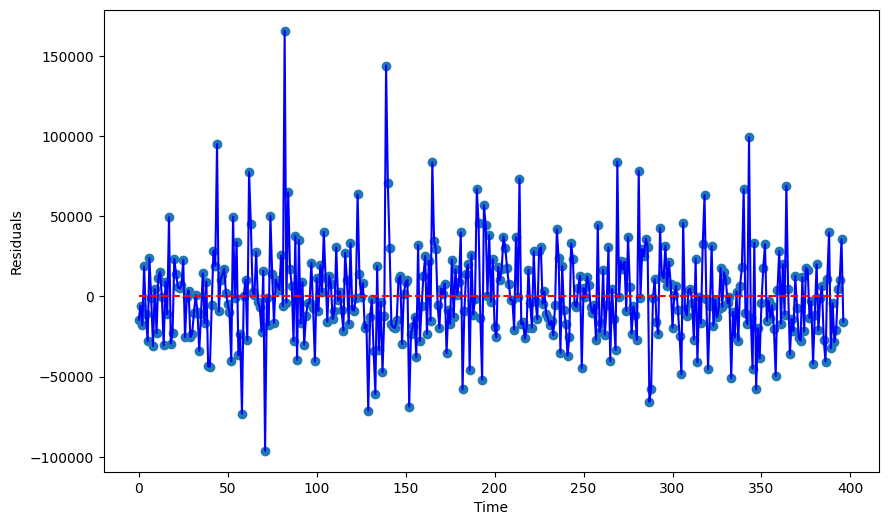

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

The residuals look all right.

## Shrinking Our Data Set

We trained the model on 29 features. Many were footage measurements for particular areas, like the first floor, the second floor, one type of porch, another type.

Would a more concise data set work better?

In [ ]:
lean_set = train.copy()
lean_set.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,1st Flr SF,2nd Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,62.0,14299,1964,1964,0.0,513.0,144.0,348.0,1005,0,...,0,0,0,0,0,0,0,7,2007,115400
2,50.0,9000,1937,1950,0.0,0.0,0.0,780.0,780,595,...,0,162,0,0,126,0,0,12,2007,141000
3,68.0,7379,2000,2000,0.0,484.0,0.0,491.0,975,873,...,280,184,0,0,0,0,0,4,2010,254000
4,60.0,7200,1936,2007,0.0,350.0,210.0,0.0,575,560,...,256,0,0,0,0,0,0,4,2009,155000
5,70.0,8521,1967,1967,0.0,842.0,0.0,70.0,912,0,...,0,0,0,0,0,0,0,5,2010,125000


In [ ]:
lean_set.columns

Index(['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

Let's remove most features related to the basement and to porches, as well as the square footage of the second floor when we already have the first.

Let's also remove Month Sold.

In [ ]:
lean_set = lean_set.drop(columns = [#'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 2', 'Bsmt Unf SF', '2nd Flr SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Mo Sold'])

What sale years are represented?

In [ ]:
lean_set.value_counts('Yr Sold')

,count
Yr Sold,
2007,477
2009,432
2006,423
2008,418
2010,234


That's a small range and the difference might not be significant.

In [ ]:
lean_set = lean_set.drop(columns = 'Yr Sold')

We did keep BsmtFin SF 1, which is the square footage of finished basement. Perhaps we could turn this into a binary value with one-hot encoding, representing whether or not there is a finished basement.

In [ ]:
lean_set.value_counts('BsmtFin SF 1')

,count
BsmtFin SF 1,
0.0,604
24.0,22
16.0,12
936.0,7
300.0,7
...,...
644.0,1
642.0,1
122.0,1


In [ ]:
lean_set['BsmtFin'] = np.where(lean_set['BsmtFin SF 1'] == 0, 0, 1)
lean_set['BsmtFin']

,BsmtFin
0,1
2,0
3,1
4,1
5,1
...,...
2632,0
2633,1
2634,1
2635,0


In [ ]:
lean_set = lean_set.drop(columns = 'BsmtFin SF 1')

In [ ]:
lean_set.columns

Index(['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Pool Area', 'Misc Val', 'SalePrice', 'BsmtFin'],
      dtype='object')

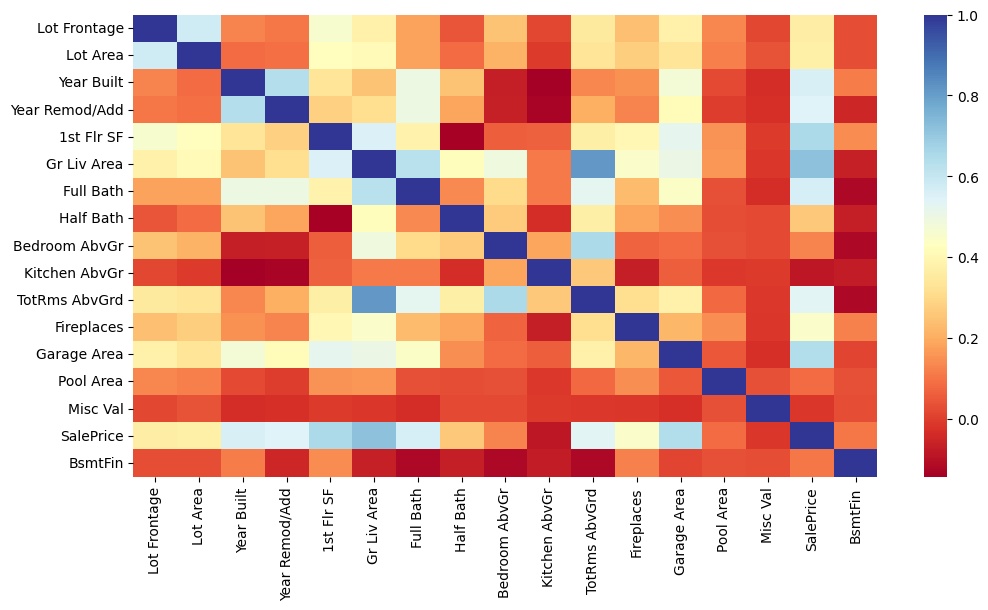

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(lean_set.corr(), cmap='RdYlBu',annot = False ) ;

## Data Visualization/Communication of Results


In [ ]:
# First we will break up our data into training and testing sets
X_2 = lean_set.drop(columns = ["SalePrice"])
y_2 = lean_set['SalePrice']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state=9)



In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit3 = model.fit(X_train_2, y_train_2)

( myfit3.intercept_ , myfit3.coef_ )


(-1913688.2823534235,
 array([-4.08448029e+01,  3.62210850e-01,  5.11984584e+02,  4.73813461e+02,
         3.57778564e+01,  6.19712935e+01,  3.23700574e+02, -1.46987240e+03,
        -1.15103471e+04, -5.24317771e+04,  7.65846494e+03,  1.00423962e+04,
         7.19606693e+01, -7.80391115e+01,  1.62075480e+00,  1.22974003e+04]))

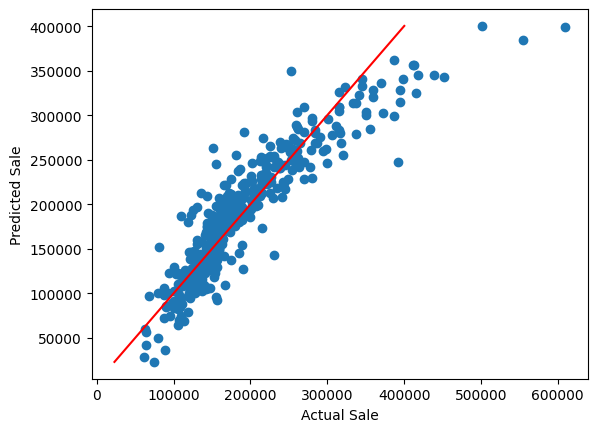

In [ ]:
# See how well our model performs on our test data
y_pred_2 = myfit3.predict(X_test_2)
plt.scatter(y_test_2, y_pred_2)
plt.plot([min(y_pred_2), max(y_pred_2)],[min(y_pred_2), max(y_pred_2)], c='red')
plt.xlabel('Actual Sale')
plt.ylabel('Predicted Sale') ;

In [ ]:
list(zip(y_test_2,y_pred_2))[:10]

[(300000, 246420.76010785764),
 (240900, 243618.67181086354),
 (167840, 195831.9585927804),
 (80000, 50162.396507756785),
 (225000, 212657.23969058972),
 (190000, 207901.99261670653),
 (181000, 199739.04897222016),
 (88000, 106206.46108156489),
 (124500, 114292.53704530653),
 (202500, 246638.37663238123)]

In [ ]:
# Calculate root mean squared percentage error on test data
rmspe_2 = np.sqrt(np.mean(np.square((y_test_2 - y_pred_2) / y_test_2))) * 100
print(f"RMSPE: {rmspe_2}")

RMSPE: 18.76346947996342


In [ ]:
results_2 = cross_val_score(model, X_2, y_2, scoring=rmspe_scorer, cv=10)

# Get the average RMSPE across all folds
avg_rmspe_2 = abs(results_2.mean())  # Take the absolute value as the scorer returns negative values
print(f"CV RMSPE: {avg_rmspe}")

CV RMSPE: 25.06206872282515


In [ ]:
print(f"CV RMSPE - First Model: {avg_rmspe}")
print(f"CV RMSPE - Second Model: {avg_rmspe_2}")

CV RMSPE - First Model: 25.06206872282515
CV RMSPE - Second Model: 25.687847291438565


Our further culled data set made the linear regression model performed a bit worse.

## Residual Analysis

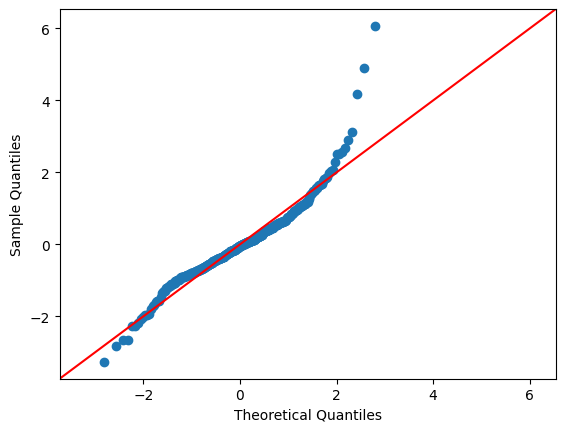

In [ ]:
# QQ Plot - Residuals are normally distributed
res_2 = y_test_2 - y_pred_2
sm.qqplot(res_2, fit=True, line="45") ;

<Axes: >

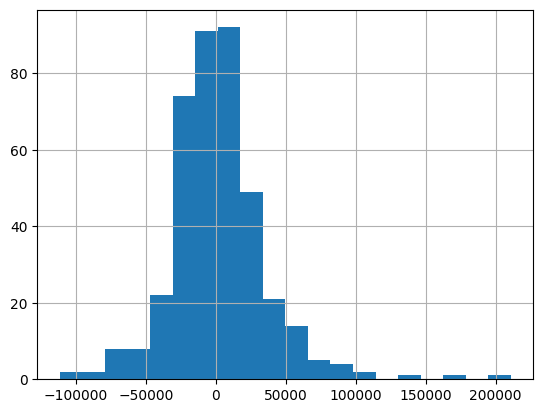

In [ ]:
res_2.hist(bins = 20 )

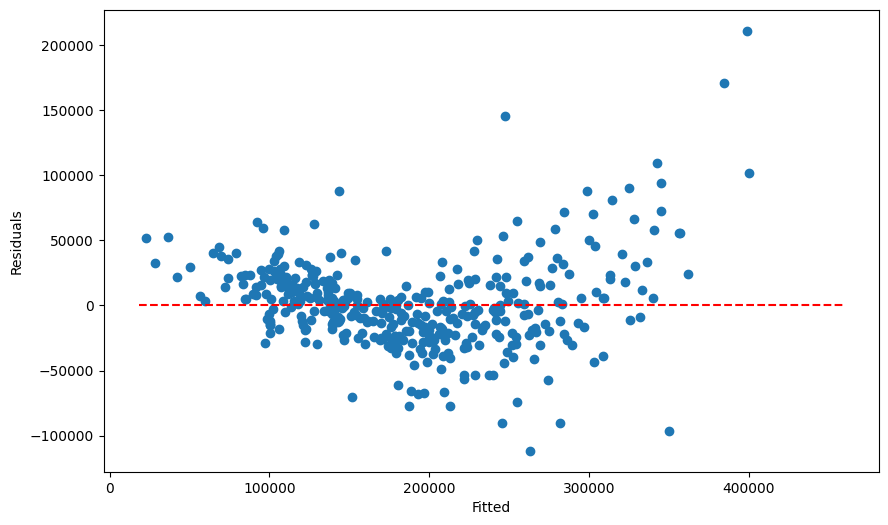

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred_2, res_2)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

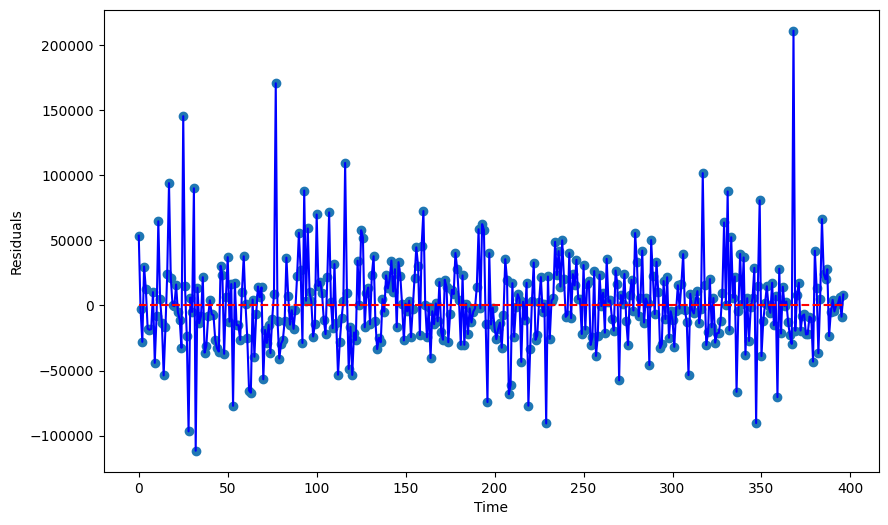

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res_2)), res_2)
plt.plot(range(len(res_2)), res_2, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res_2))), max(range(len(res_2))), colors = 'red', linestyles = 'dashed') ;

The residuals are normally distributed for the most part for the second run.

In [ ]:
# # Compare intercepts
# print("Original Intercept:", myfit2.intercept_)
# print("New Intercept:", myfit3.intercept_)

# # Compare coefficients
# print("Original Coefficients:", myfit2.coef_)
# print("New Coefficients:", myfit3.coef_)

##Conclusion

In [ ]:
print(f"The first model was trained with {train.shape[0]} rows and {train.shape[1]-1} columns of data.")
print(f"It had an RMSPE of {avg_rmspe}%.")
print(" ")
print(f"The second model model was trained {lean_set.shape[0]} rows and {lean_set.shape[1]-1} columns of data.")
print(f"It had an RMSPE of {avg_rmspe_2}%.")


The first model was trained with 1984 rows and 29 columns of data.
It had an RMSPE of 25.06206872282515%.
 
The second model model was trained 1984 rows and 16 columns of data.
It had an RMSPE of 25.687847291438565%.


### Model performance

- Both models started with completely removing columns with nominal data and all nulls, either Biden, dropping columns or rows.
- The second model was trained with about half as many features. Well, we hoped this might help eliminate noise, the model performs slightly worse before and after cross-validation.
- The difference between the prediction error of the models is around .6%. Both have a root mean squared percentage error between 25% and 26%.

### Future exploration/ Next steps

- In the interest of finding a minimum set of variables to use, we could start over with the original data set and eliminate even more columns from the outset, before moving to correlation analysis. If the prediction rate was better, or even the same, we'd have gotten there with less time and effort spent on the data.
- The range of years was small, but it did send her around 2008. Given the volatility of housing prices from that year, it's possible that the year data are relevant and should be included.
- The first model included the month of the year when the house was sold, and the second one didn't. It might be worth looking specifically at whether this feature correlates at all with the target.
- The minimum sale price was quite low for a house in the mid to late 2000s. Further review of the data dictionary shows that Sale Condition, phenomenal feature, that we eliminated, include some types of sale such as foreclosed homes and sales between family members. These less common types of sale may add error to our predictions. Sales matching certain categories could be removed or we could incorporate Sale Condition as a feature.
- Our binary feature for finish basements didn't appear to do much. It's probably not worth the time to one-hot encode that feature. It could just be removed, or perhaps basement square footage should be used as a feature.
- Neither model predicted the very highest sale prices from our data well. This could be looked into further.